In [1]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt

Person to Companies Mapping:
Person_0: ['Company_8', 'Company_11']
Person_1: ['Company_18', 'Company_16', 'Company_11', 'Company_17']
Person_2: ['Company_18', 'Company_17', 'Company_14', 'Company_8', 'Company_4']
Person_3: ['Company_0', 'Company_10']
Person_4: ['Company_2', 'Company_18', 'Company_11', 'Company_5', 'Company_7']
Person_5: ['Company_18', 'Company_2']
Person_6: ['Company_9', 'Company_18', 'Company_2', 'Company_5', 'Company_14']
Person_7: ['Company_14', 'Company_7', 'Company_8', 'Company_13']
Person_8: ['Company_5', 'Company_8']
Person_9: ['Company_8', 'Company_6']

Metrics:
          Degree Centrality  Betweenness Centrality  Closeness Centrality  \
Person_0              0.750                0.044643              0.800000   
Person_2              1.000                0.135119              1.000000   
Person_7              0.750                0.027976              0.800000   
Person_8              0.750                0.027976              0.800000   
Person_9             

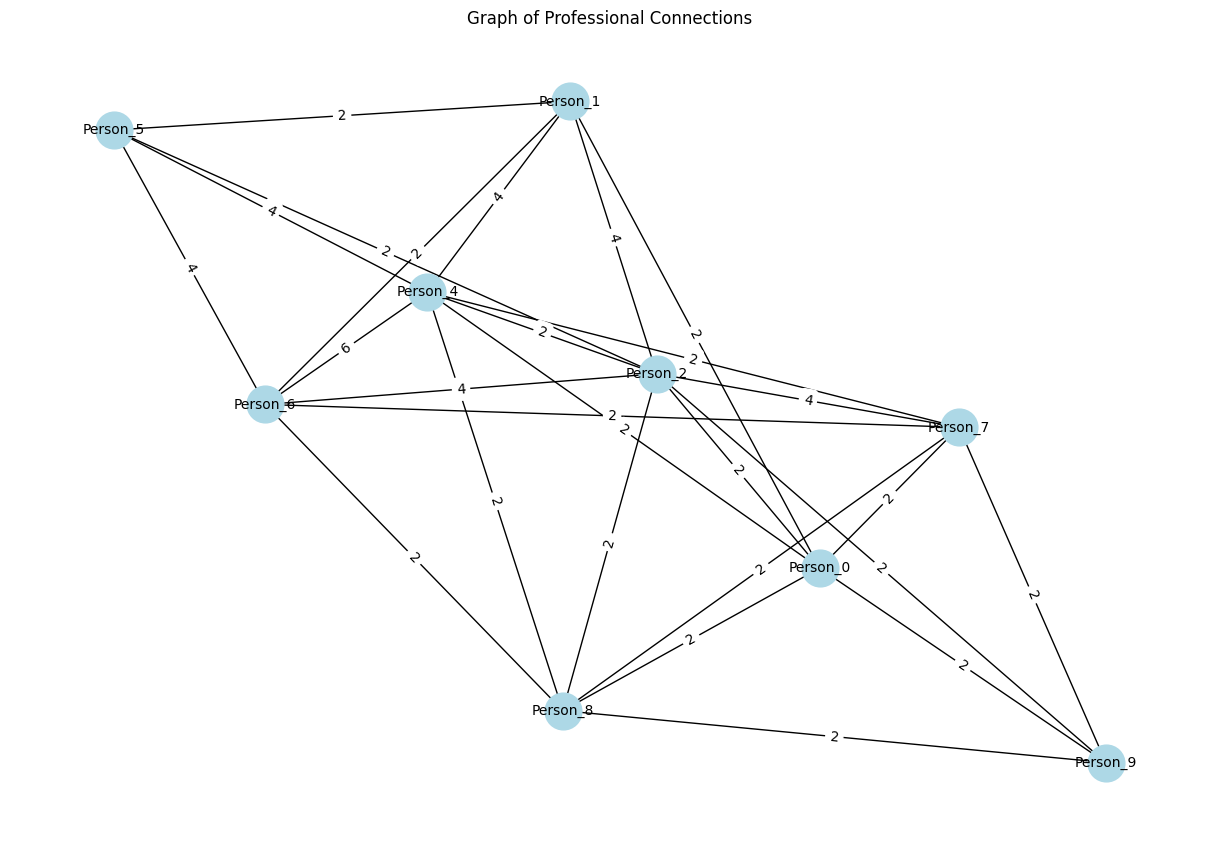

In [3]:
num_people = 10
num_companies = 20

people = [f'Person_{i}' for i in range(num_people)]
companies = [f'Company_{i}' for i in range(num_companies)]

person_companies = {person: random.sample(companies, random.randint(2, 5)) for person in people}

G = nx.Graph()

for person, assigned_companies in person_companies.items():
    for company in assigned_companies:
        for other_person in person_companies:
            if other_person != person and company in person_companies[other_person]:
                if G.has_edge(person, other_person):
                    G[person][other_person]['weight'] += 1
                else:
                    G.add_edge(person, other_person, weight=1)

print("Person to Companies Mapping:")
for person, comps in person_companies.items():
    print(f"{person}: {comps}")

degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
clustering_coeff = nx.clustering(G)

results = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Clustering Coefficient': clustering_coeff
})

print("\nMetrics:")
print(results)

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10)
edge_weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
plt.title("Graph of Professional Connections")
plt.show()


In [ ]:

# 1. Degree Centrality
# Definition: The degree centrality of a node (person) is the number of edges connected to it. It quantifies how many direct connections a person has.
# What It Tells You:
# Individuals with high degree centrality are well-connected and have a broad network of relationships.
# These people may have greater access to information and resources and are often seen as influential within the organization.
# A high degree centrality can indicate that a person is a key player in the network, potentially useful for driving change or influencing decisions.

# 2. Betweenness Centrality
# Definition: Betweenness centrality measures the number of times a node lies on the shortest path between other nodes. It reflects how often a person acts as a bridge along the shortest path between two other people.
# What It Tells You:
# Individuals with high betweenness centrality may have significant control over the flow of information and resources in the network.
# They are often in a position to facilitate communication between disparate groups, acting as connectors or brokers.
# High betweenness can indicate that the individual has a strategic position in the network, making them valuable for initiatives that require collaboration across different teams or departments.

# 3. Closeness Centrality
# Definition: Closeness centrality measures how close a node is to all other nodes in the network. It is calculated as the inverse of the sum of the shortest paths from the node to all other nodes.
# What It Tells You:
# Individuals with high closeness centrality can reach others in the network quickly. They are "close" to many other people.
# This metric is useful for identifying people who can efficiently disseminate information or mobilize resources across the network.
# A high closeness centrality can also indicate that the person has a good understanding of the network dynamics, making them effective in collaborative environments.

# 4. Clustering Coefficient
# Definition: The clustering coefficient measures the degree to which nodes in a graph tend to cluster together. For an individual, it indicates how many of their neighbors are also connected to each other.
# What It Tells You:
# A high clustering coefficient indicates that a person is part of tightly-knit groups or communities, where people have strong relationships with one another.
# Individuals with high clustering can benefit from close relationships and trust within their network, leading to better collaboration and support.
# This metric can help HR understand the social dynamics and potential team cohesion within candidate pools.